# Sales Prediction Using Simple Linear Regression

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Salary_dataset.csv')

In [4]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [5]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
df.shape

(30, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


Exploratory Data Analysis

In [9]:
# Null value Treatment

df.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [10]:
# Drop duplicate values

df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [11]:
# calculate summary statistics

df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [12]:
# Split Dataset

X = df['YearsExperience']
y = df['Salary']

In [13]:
# Splitting Training and Testing Datasets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [16]:
# Convert series to DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


In [17]:
#Model Fitting

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
reg.fit(X_train,y_train)

LinearRegression()

In [21]:
#Predict output for the X_test dataset

In [22]:
y_pred = reg.predict(X_test)
y_pred

array([[39297.22202233],
       [75603.43359409],
       [37386.36878171],
       [60316.60766914],
       [63182.88753007],
       [52673.19470666]])

In [23]:
# Checking accuracy score

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [26]:
mse = mean_squared_error(y_test, y_pred)
mse

36064238.493955195

In [27]:
r2 = r2_score(y_test, y_pred)
r2

0.8143022783109011

In [30]:
# Mean Absolute Error

mae = mean_absolute_error(y_test, y_pred)
mae

5392.453356511894

In [31]:
#Sales Prediction

In [32]:
marketing = pd.read_csv('/content/tvmarketing.csv')

In [34]:
marketing

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [35]:
marketing.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [40]:
marketing.shape

(200, 2)

In [41]:
marketing.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

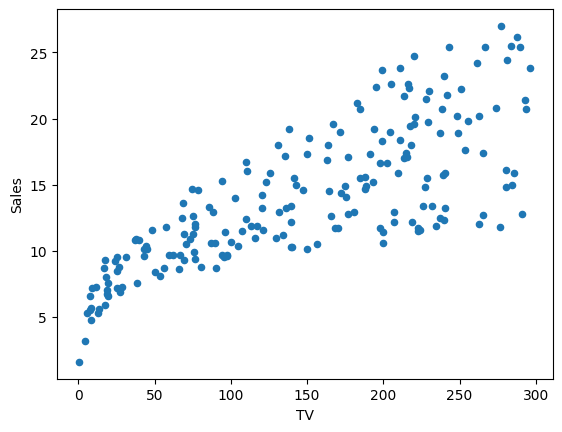

In [43]:
marketing.plot(x = 'TV', y = 'Sales', kind = 'scatter')

In [44]:
X = marketing['TV'].values.reshape(-1,1)
y = marketing['Sales'].values.reshape(-1,1)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
regression = LinearRegression()

In [48]:
regression.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = regression.predict(X_test)

In [50]:
print(regression.coef_)

[[0.04600779]]


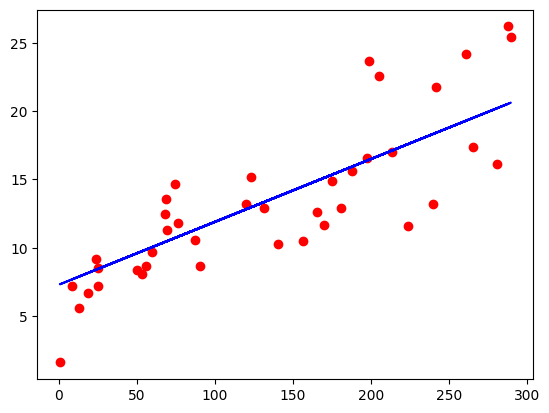

In [56]:
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.show()

In [57]:
from sklearn import metrics

In [59]:

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  2.505418178966003
Mean Squared Error:  10.18618193453022
R2 Score:  0.6763151577939721
